In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Boston
bos_listings = pd.read_csv('/Users/fiona/Documents/boston/listings.csv')
bos_calendar = pd.read_csv('/Users/fiona/Documents/boston/calendar.csv')
bos_reviews = pd.read_csv('/Users/fiona/Documents/boston/reviews.csv')

In [3]:
bos_listings = bos_listings.rename(columns = {'id':'listing_id'})

In [4]:
bos_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [5]:
bos_listings['host_id'] = bos_listings['host_id'].astype(str)

In [6]:
df = bos_listings.drop_duplicates(['host_id'], keep = 'first')

In [7]:
df['host_total_listings_count'].describe()

count    2181.000000
mean        2.930307
std        23.676813
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       749.000000
Name: host_total_listings_count, dtype: float64

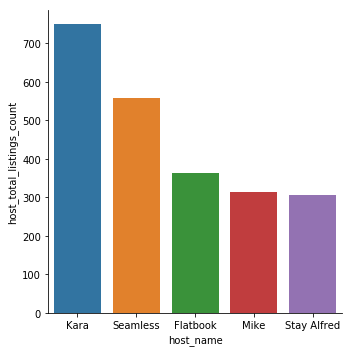

In [8]:
#fig, ax = plt.subplots(figsize=(10,5))
sns.catplot(x = 'host_name', y = 'host_total_listings_count', kind = 'bar'
            ,data = df.ix[df['host_total_listings_count'].nlargest(5).index])

In [9]:
bos_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [10]:
df1 = bos_calendar[bos_calendar['available'] == 'f'].groupby(['listing_id']).size().reset_index(name = 'no_occupancy')

In [11]:
df1 = pd.merge(left = bos_listings, right = df1, on = 'listing_id', how = 'left')

In [12]:
df1['price'] = df1['price'].str.strip('$')
df1['price'] = df1['price'].str.replace('.', '')
df1['price'] = df1['price'].str.replace(',', '')
df1['price'] = (df1['price'].astype(int))/100

In [13]:
df1['income'] = df1['price'] * df1['no_occupancy']

In [14]:
top_earners = df1.groupby(['host_id','host_name'])['income'].agg('sum').nlargest(5).reset_index(name = 'income')

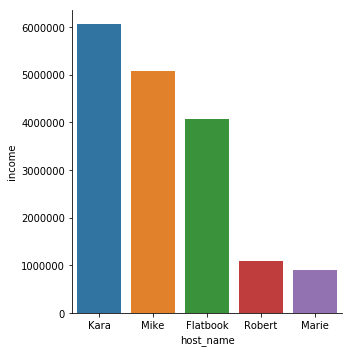

In [15]:
sns.catplot(x = 'host_name', y = 'income', kind = 'bar'
            ,data = top_earners)

In [16]:
top_earners

,host_id,host_name,income
0,30283594,Kara,6056606.0
1,9419684,Mike,5078705.0
2,12243051,Flatbook,4069564.0
3,38001139,Robert,1095000.0
4,32532791,Marie,897591.0


In [17]:
#karalistings
bos_listings['price'] = bos_listings['price'].str.strip('$')
bos_listings['price'] = bos_listings['price'].str.replace('.', '')
bos_listings['price'] = bos_listings['price'].str.replace(',', '')
bos_listings['price'] = (bos_listings['price'].astype(int))/100


In [18]:
bos_listings[bos_listings['host_id']=='30283594']['price'].mean()

236.7941176470588

In [19]:
bos_reviews = pd.merge(left = bos_reviews, right = bos_listings[['listing_id','host_id']], on = 'listing_id',how = 'left')

In [20]:
kara_reviews = bos_reviews[bos_reviews['host_id'] == '30283594']

In [21]:
kara_reviews['id'].nunique()

87

In [22]:
kara_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,host_id
3217,10116601,69029809,2016-04-08,39940660,Kristen,Beautiful apartment. Very comfortable! Host ...,30283594
3362,12303347,86098452,2016-07-14,24845289,Ben,"Amazing, high rise unit with city views and al...",30283594
5701,7869497,57467429,2015-12-26,8181605,Eben,The place you are shown to when you rent this ...,30283594
5702,7869497,60013380,2016-01-18,30801249,Meshari,"Hello,\nIt was a great time I spend in your ap...",30283594
7840,8336347,56709549,2015-12-16,48566983,Erik Freyr,"Really great place ! Very clean, spacious , mo...",30283594


In [32]:
#Create a word cloud for the text reviews 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

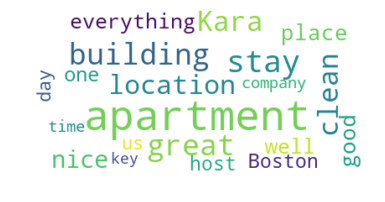

In [33]:
# Start with one review:
#text = kara_reviews.comments[3217]
text = str(kara_reviews.comments.values)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [132]:
bos_listings.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [86]:
no_listings = bos_listings.groupby(['neighbourhood_cleansed']).size().reset_index(name = 'listings')

In [129]:
top_listings = list(no_listings.nlargest(10, columns = 'listings')['neighbourhood_cleansed'].values)

In [161]:
top_listings

['Jamaica Plain',
 'South End',
 'Back Bay',
 'Fenway',
 'Dorchester',
 'Allston',
 'Beacon Hill',
 'Brighton',
 'South Boston',
 'Downtown']

In [130]:
top_list_des = bos_listings[bos_listings['neighbourhood_cleansed'].isin(top_listings)]

In [145]:
import re
def multiwordReplace(text, wordDic):
    """
    take a text and replace words that match a key in a dictionary with
    the associated value, return the changed text
    """
    rc = re.compile('|'.join(map(re.escape, wordDic)))
    
    def translate(match):
        return wordDic[match.group(0)]
    return rc.sub(translate, text)


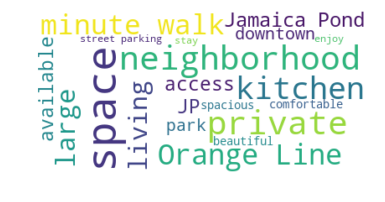

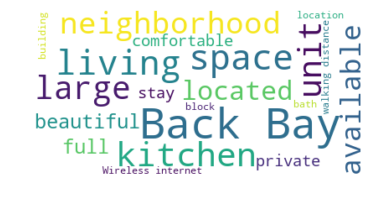

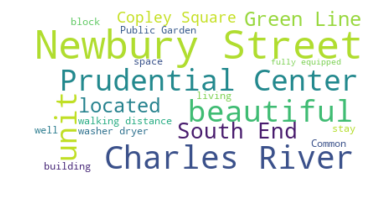

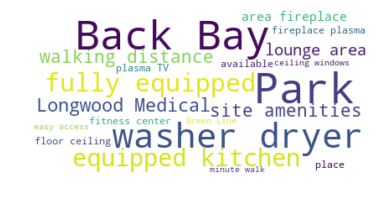

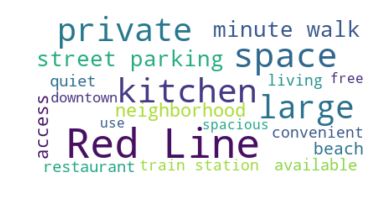

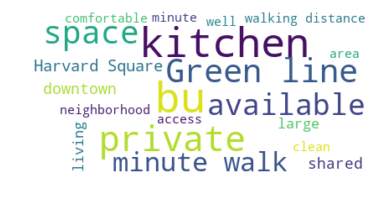

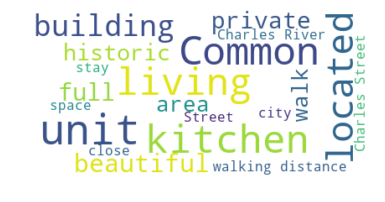

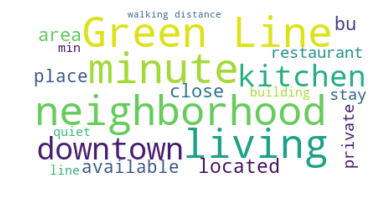

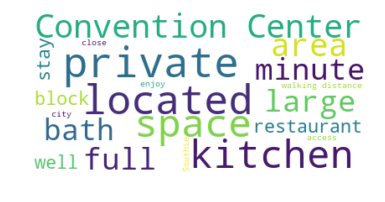

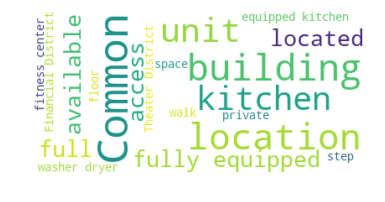

In [152]:
for i in top_listings:
    text = str(top_list_des.loc[top_list_des['neighbourhood_cleansed'] == i,'description'].values)
    wordDic = {
        'Boston': '',
         i:'',
        'bedroom':'',
        'Apartment':'',
        'condo':'',
        'apartment':'',
        'bathroom':'',
        'house':'',
        'room':'',
        'will':'',
        'home':'',
        'one':'',
        'two':'',
        'bed':'',
        'guest':'',
        'great':'',
    
    }
    # call the function and get the changed text
    str2 = multiwordReplace(text, wordDic)
    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(str2)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [155]:
over_75 = bos_listings[bos_listings['price'] > 220]

In [159]:
over_75.dtypes

listing_id                            int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                              object
host_url                             object
host_name                            object
host_since                      

In [160]:
bos_listings['neighbourhood_cleansed'].value_counts()

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Bay Village                 24
Mattapan                    24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64